<a href="https://colab.research.google.com/github/jhchang/Forecasting-Solar-Irradiance/blob/main/02_Exploratory_Data_Analysis_and_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

---

## 📘 Exploratory Analysis and Modeling Preparation

In this notebook, we begin the next phase of the project: exploring the cleaned weather dataset and preparing it for machine learning models that forecast **Global Horizontal Irradiance (GHI)** at the future site of the **Al Shuaibah 2 Solar Farm** — the world's largest single-site solar energy project, located in Saudi Arabia.

---

### 🎯 Goals of This Notebook

* 🔎 **Understand the patterns** and distribution of solar and atmospheric variables over time
* 📈 **Visualize key trends** such as diurnal and seasonal cycles in GHI, temperature, humidity, and clearness index
* 📊 Identify correlations and **feature relationships** with GHI
* 🧠 Perform **feature selection and engineering**, including lagged variables or rolling statistics
* 🧪 Prepare training and test sets using **time-aware splitting strategies**

---

### 🛠 Tools Used

* `matplotlib`, `seaborn`, and `plotly` for time series and heatmap visualizations
* `pandas` for time-based grouping, feature generation, and windowing
* `scikit-learn` for preprocessing and correlation analysis

---

By the end of this notebook, we’ll have a deeper understanding of the **solar energy profile** at the site, and a well-prepared feature set ready for training ML models in the next stage.

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Replace with your file path
file_path = "/content/drive/MyDrive/datasets/cleaned_weather_data.csv"

df = pd.read_csv(file_path, parse_dates=True, index_col=0)

In [ ]:
display(df.index)  # Should be DatetimeIndex
display(df.iloc[5:10]) # Check your data looks correct

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2023-12-31 14:00:00', '2023-12-31 15:00:00',
               '2023-12-31 16:00:00', '2023-12-31 17:00:00',
               '2023-12-31 18:00:00', '2023-12-31 19:00:00',
               '2023-12-31 20:00:00', '2023-12-31 21:00:00',
               '2023-12-31 22:00:00', '2023-12-31 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=26280, freq=None)

,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,T2M,T2MDEW,T2MWET,PRECTOTCORR,PS,WS10M,WD10M
timestamp,,,,,,,,,,,,,,,,,,,,
2021-01-01 05:00:00,0.00,0.00,0.00,0.00,0.00,0.00,90.00,0.00,0.00,0.00,0.00,0.00,14.65,25.34,20.09,22.72,5.38,100.61,1.32,98.3
2021-01-01 06:00:00,0.00,0.00,0.00,0.00,0.00,0.00,90.00,0.00,0.00,0.00,0.00,0.00,14.43,25.18,19.84,22.51,5.23,100.66,1.41,97.7
2021-01-01 07:00:00,39.72,40.35,22.50,34.28,0.30,0.22,84.58,18.58,18.83,2.26,0.01,0.03,14.13,25.65,19.50,22.58,8.31,100.71,1.51,105.3
2021-01-01 08:00:00,203.00,205.23,214.64,126.78,0.48,0.21,72.65,93.43,94.13,10.60,0.10,0.50,14.38,26.78,19.80,23.29,14.53,100.78,1.77,132.7
2021-01-01 09:00:00,367.80,389.25,309.22,205.34,0.55,0.09,61.80,170.48,179.43,20.24,0.34,1.70,14.54,27.79,19.99,23.89,9.31,100.84,2.43,161.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26280 entries, 2021-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALLSKY_SFC_SW_DWN    26280 non-null  float64
 1   CLRSKY_SFC_SW_DWN    26280 non-null  float64
 2   ALLSKY_SFC_SW_DNI    26280 non-null  float64
 3   ALLSKY_SFC_SW_DIFF   26280 non-null  float64
 4   ALLSKY_KT            26280 non-null  float64
 5   ALLSKY_SRF_ALB       26280 non-null  float64
 6   SZA                  26280 non-null  float64
 7   ALLSKY_SFC_PAR_TOT   26280 non-null  float64
 8   CLRSKY_SFC_PAR_TOT   26280 non-null  float64
 9   ALLSKY_SFC_UVA       26280 non-null  float64
 10  ALLSKY_SFC_UVB       26280 non-null  float64
 11  ALLSKY_SFC_UV_INDEX  26280 non-null  float64
 12  QV2M                 26280 non-null  float64
 13  T2M                  26280 non-null  float64
 14  T2MDEW               26280 non-null  float64
 15  T

In [ ]:
df.describe()

,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,T2M,T2MDEW,T2MWET,PRECTOTCORR,PS,WS10M,WD10M
count,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000
mean,255.953744,267.996677,227.443301,91.919206,0.301234,0.094338,70.820131,116.685575,121.347538,14.706566,0.407131,2.142585,14.392692,30.092954,18.928719,24.510805,0.457095,100.315903,4.353933,235.569787
std,334.655512,345.790381,291.357257,113.466771,0.314373,0.097795,24.710710,152.404515,156.518628,19.657537,0.635833,3.417422,3.479791,4.801035,4.308818,3.674601,4.089145,0.444703,2.231339,109.831410
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,4.710000,16.810000,1.750000,10.110000,0.000000,99.080000,0.050000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.460000,0.000000,0.000000,0.000000,0.000000,0.000000,11.950000,26.820000,16.330000,22.170000,0.000000,99.930000,2.690000,165.900000
50%,13.240000,13.965000,1.595000,14.830000,0.250000,0.090000,87.875000,5.800000,6.110000,0.720000,0.000000,0.030000,14.460000,30.200000,19.510000,25.120000,0.000000,100.330000,4.060000,276.000000
75%,532.235000,578.502500,487.300000,179.675000,0.640000,0.180000,90.000000,244.907500,264.055000,30.200000,0.710000,3.580000,16.820000,33.270000,22.070000,27.370000,0.010000,100.680000,5.720000,327.000000
max,1088.120000,1090.430000,1061.740000,562.010000,0.820000,0.360000,90.000000,478.720000,475.260000,65.580000,2.700000,16.050000,25.770000,45.180000,29.310000,32.010000,315.420000,101.560000,14.570000,359.900000


# 🔍 Exploratory Data Analysis (EDA)

In this section, we explore the relationships between key environmental variables and solar irradiance (GHI) to better understand the underlying patterns in the dataset. This analysis informs our feature engineering choices and helps identify redundancies, missing values, and time-based dependencies.

We begin by visualizing the correlation structure of the data, followed by an investigation of how GHI varies across time (hourly, monthly) and in relation to atmospheric features such as solar zenith angle, temperature, and clearness index.


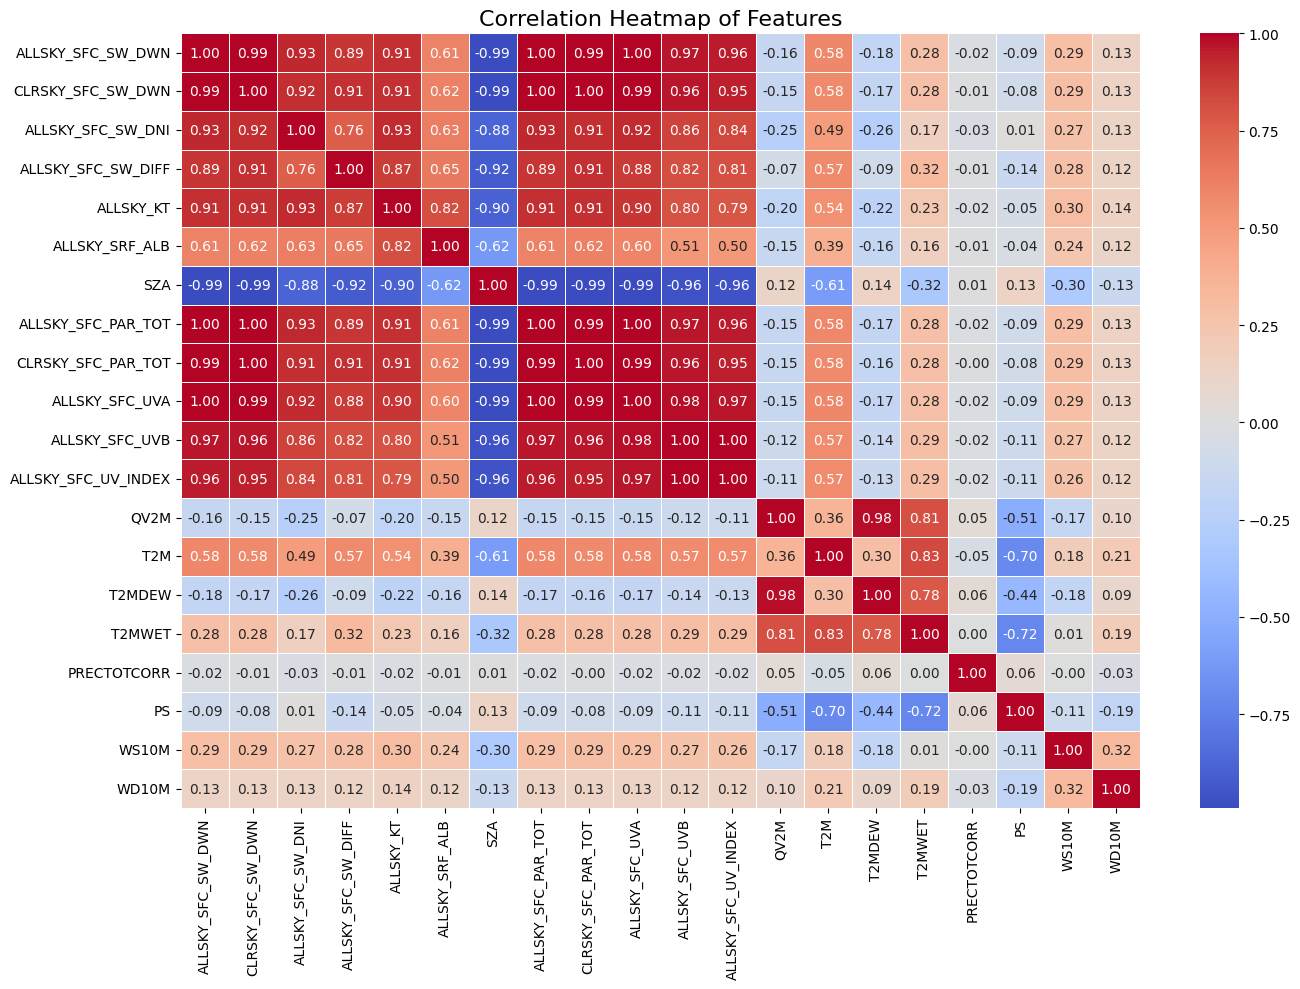

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset for numeric columns only
numeric_cols = df.select_dtypes(include='number').dropna()

# Compute correlation
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.tight_layout()
plt.show()

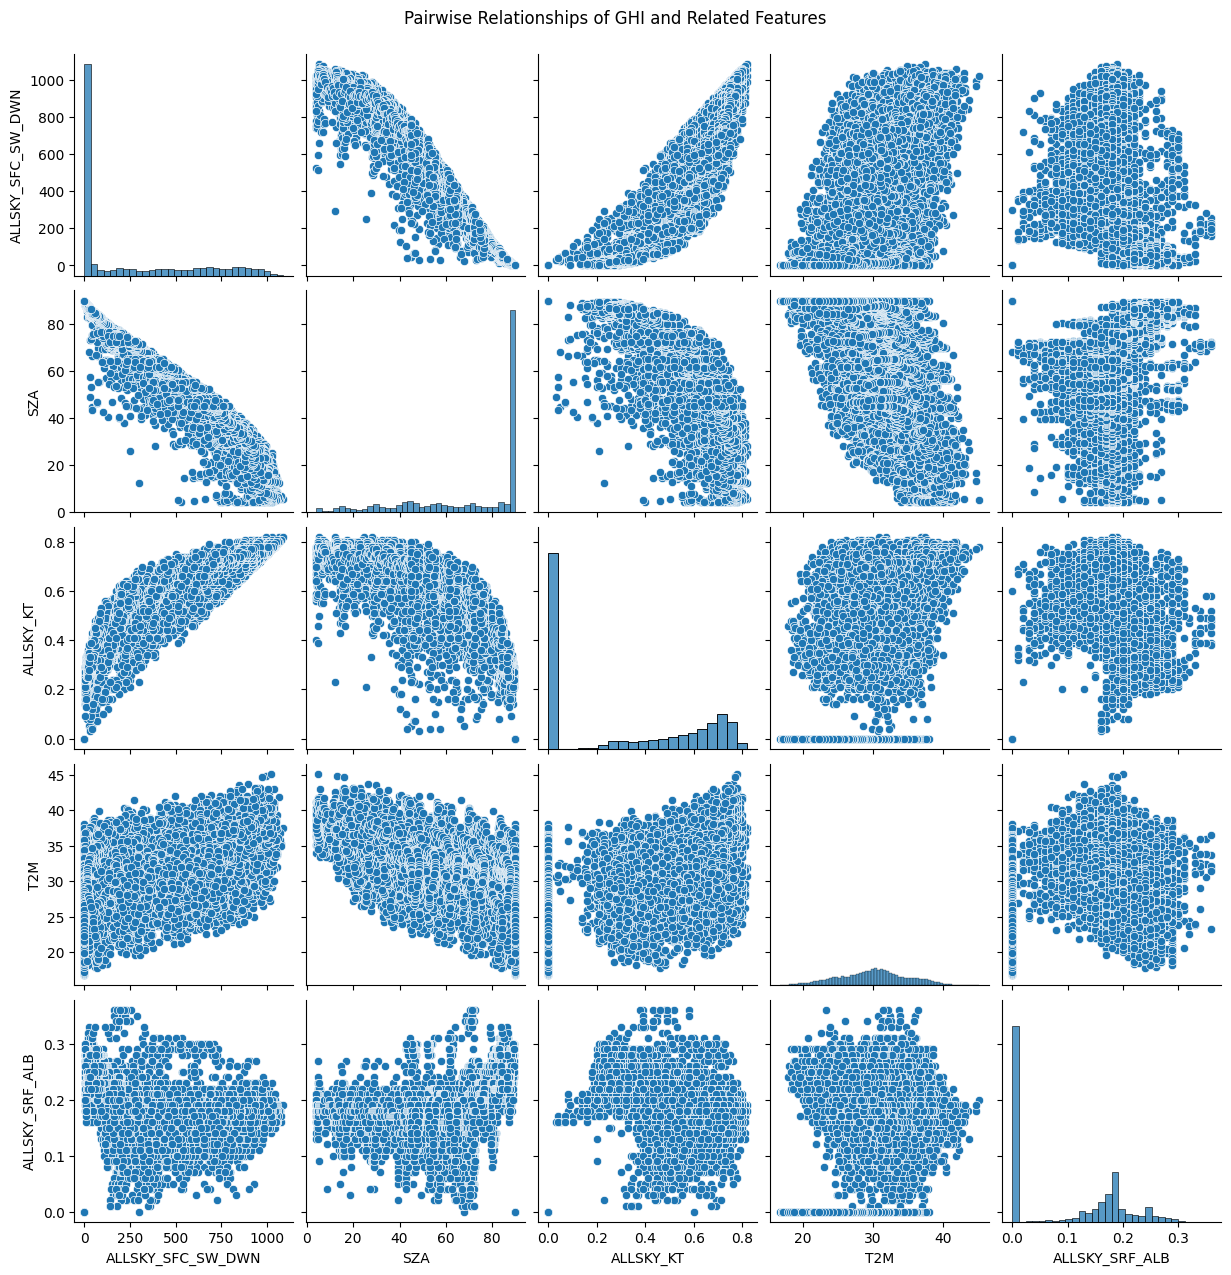

In [ ]:
sns.pairplot(df, vars=['ALLSKY_SFC_SW_DWN', 'SZA', 'ALLSKY_KT', 'T2M', 'ALLSKY_SRF_ALB'])
plt.suptitle('Pairwise Relationships of GHI and Related Features', y=1.02)
plt.show()

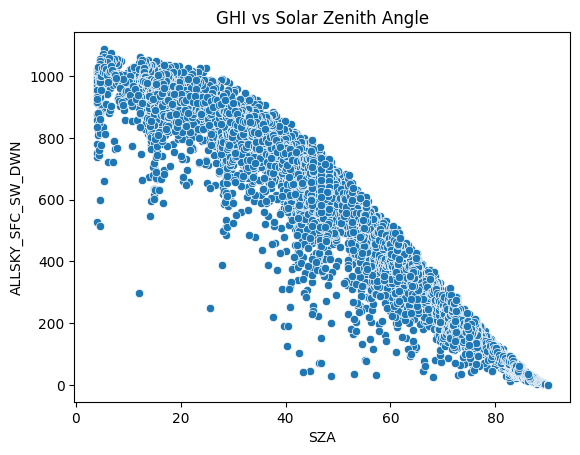

In [ ]:
sns.scatterplot(data=df, x='SZA', y='ALLSKY_SFC_SW_DWN')
plt.title('GHI vs Solar Zenith Angle')
plt.show()

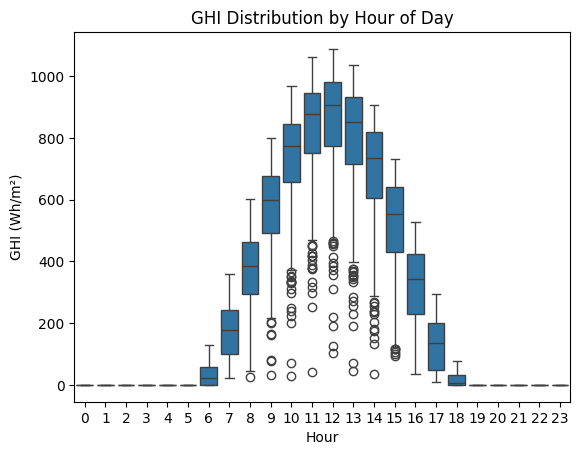

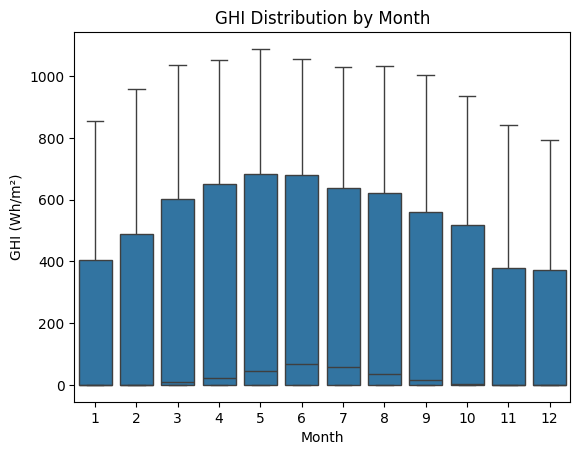

In [ ]:
# GHI by hour
sns.boxplot(x=df.index.hour, y='ALLSKY_SFC_SW_DWN', data=df)
plt.title('GHI Distribution by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('GHI (Wh/m²)')
plt.show()

# GHI by month
sns.boxplot(x=df.index.month, y='ALLSKY_SFC_SW_DWN', data=df)
plt.title('GHI Distribution by Month')
plt.xlabel('Month')
plt.ylabel('GHI (Wh/m²)')
plt.show()

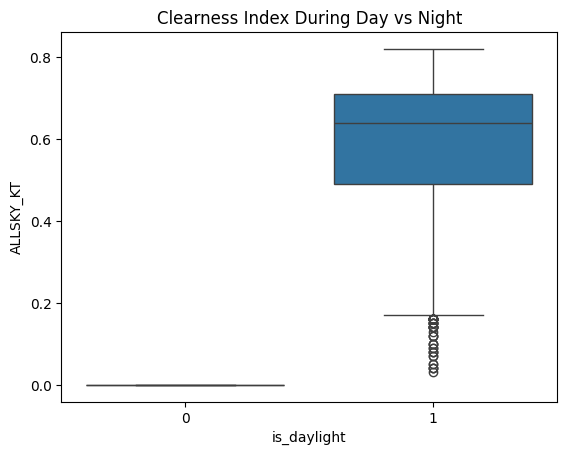

In [ ]:
df['is_daylight'] = (df['ALLSKY_SFC_SW_DWN'] > 0).astype(int)

sns.boxplot(x='is_daylight', y='ALLSKY_KT', data=df)
plt.title('Clearness Index During Day vs Night')
plt.show()
df.drop('is_daylight', axis=1, inplace=True)

# Analysis of EDA graphs

---

## ✅ Annotated Review of Correlation Heatmap

### 🎯 The Target: `ALLSKY_SFC_SW_DWN` (GHI)

### 🚀 Highly Correlated Features (Strong predictors)

These are **excellent candidates to keep**:

| Feature                               | Corr with GHI | Notes                                                                          |
| ------------------------------------- | ------------- | ------------------------------------------------------------------------------ |
| `CLRSKY_SFC_SW_DWN`                   | **0.99**      | Strong overlap, may be redundant but useful for comparing clear-sky vs all-sky |
| `ALLSKY_SFC_SW_DNI`                   | 0.93          | Direct Normal Irradiance — highly physically related                           |
| `ALLSKY_SFC_SW_DIFF`                  | 0.89          | Diffuse component — important during hazy/cloudy times                         |
| `ALLSKY_KT`                           | 0.91          | Clearness index — physically meaningful                                        |
| `ALLSKY_SFC_PAR_TOT`                  | 0.92          | PAR ≈ GHI proxy — likely redundant but valid                                   |
| `CLRSKY_SFC_PAR_TOT`                  | 0.91          | Similar to above — keep one for comparison                                     |
| `ALLSKY_SFC_UVA` / `UVB` / `UV_INDEX` | 1–0.97     | Closely tied to sunlight — probably keep `UV_INDEX` only                       |


---
### 👍 Moderately Correlated Features (ρ = 0.4 – 0.85)

Still valuable to keep; these may capture partial or contextual influences on GHI.

| Feature          | Corr with GHI | Notes                                                                                                    |
| ---------------- | ------------- | -------------------------------------------------------------------------------------------------------- |
| `ALLSKY_SRF_ALB` | **0.61**     | Moderate **positive** correlation; likely due to high ground reflectivity in clear/dry desert conditions |
| `T2M`            | **0.58**     | Air temperature — physically related to solar heating                                                    |
| `T2MWET`         | **0.28**    | Redundant with `T2M`, useful if modeling humidity                                                        |
| `WS10M`          | **0.29**    | Wind speed — could help identify dusty periods or storms                                                 |
| `WD10M`          | **0.13**     | Wind direction — low correlation, only helpful in dust-specific modeling                                 |


---

### ❗ Negatively Correlated (Inverse physical signals)

| Feature          | Corr      | Notes                                                               |
| ---------------- | --------- | ------------------------------------------------------------------- |
| `SZA`            | **-0.99** | Extremely important — zenith angle (sun high = low SZA, high GHI)   |


---

### 🤔 Weak or Uncorrelated Features (Consider Dropping)

| Feature       | Corr  | Action                                                                               |
| ------------- | ----- | ------------------------------------------------------------------------------------ |
| `QV2M`        | -0.16 | Low relevance, unless dust/humidity context is useful                                |
| `PS`          | -0.09 | Could help with storm prediction |
| `PRECTOTCORR` | -0.02 | Could help with storm prediction                   |
| `WD10M`       | 0.13  | Could help with storm prediction                                    |
| `T2MDEW`      | -0.18 | Could help with storm prediction |

---

Even though some features show weak correlation with GHI in general and some high inter-correlation, I retained them for model experimentation. These features may capture rare but impactful weather events (storms, high humidity, haze) that strongly suppress solar irradiance.

## 🔥 Features to be removed
| Pair                                         | Corr      | Keep                                                          |
| -------------------------------------------- | --------- | ------------------------------------------------------------- |
| `UVA` vs `UVB` vs `UV_INDEX`                 | **>0.97** | ✅ Keep only `UV_INDEX`                                        |


---

## List of the most important features

```python
selected_features = [
    "CLRSKY_SFC_SW_DWN",       # Clear-sky GHI
    "ALLSKY_SFC_SW_DNI",       # Direct Normal
    "ALLSKY_SFC_SW_DIFF",      # Diffuse
    "ALLSKY_KT",               # Clearness index
    "SZA",                     # Solar zenith angle
    "ALLSKY_SRF_ALB",          # Albedo (reflectance)
    "ALLSKY_SFC_UV_INDEX",     # Single representative UV feature
    "T2M",                     # Ambient temperature
    "WS10M"                    # Wind speed (optional for dust/storm modeling)
]
```
---

### 🇸🇦 Feature Relevance Commentary (Saudi Arabia Context)

Given the unique solar and atmospheric conditions in Saudi Arabia — especially high insolation levels, desert dust, and clear-sky dominance — we selected features based on their physical importance and statistical correlation with GHI (Global Horizontal Irradiance).

Key retained features include:
- **`CLRSKY_SFC_SW_DWN`** and **`ALLSKY_SFC_SW_DNI`**: Represent clear-sky potential vs actual irradiance.
- **`SZA` (Solar Zenith Angle)**: Shows inverse relationship with GHI; sun overhead corresponds to higher irradiance.
- **`ALLSKY_KT` (Clearness Index)**: Reflects atmospheric clarity, useful for dusty and hazy periods.
- **`UV Index` and `T2M`**: Represent solar intensity and ambient air conditions.
- **`ALLSKY_SRF_ALB` (Albedo)**: Helps account for surface reflectivity changes, especially relevant during sandstorms or cloudy conditions.

We removed 2 features to improve model robustness, interpretability, and speed. We would have liked to remove more but forecasting weather data is difficult and I would like the model to be able to forecast storms for GHI forecasting.

---

In [ ]:
df.drop(['ALLSKY_SFC_UVA', 'ALLSKY_SFC_UVB'], axis=1, inplace=True)

# 📈 STL Decomposition

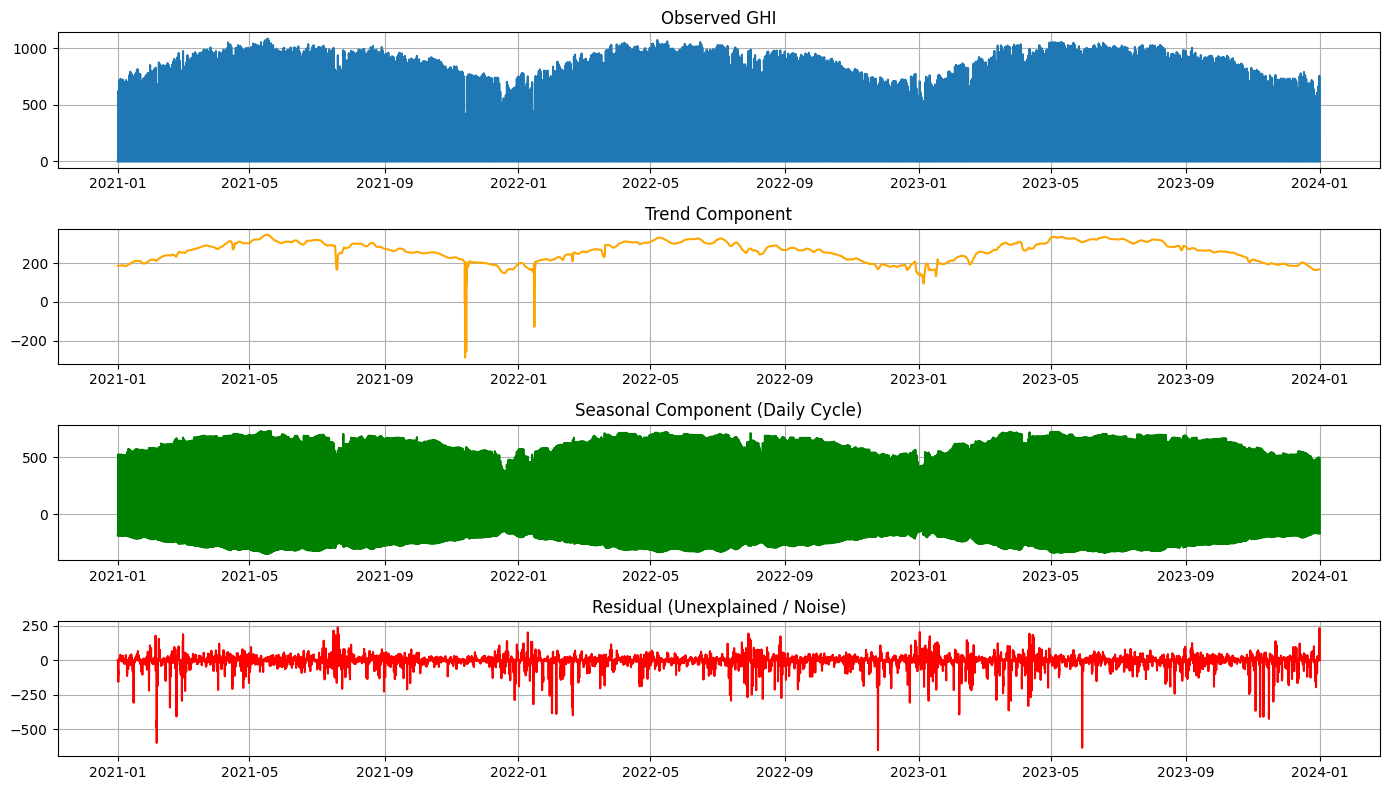

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Select the GHI column and ensure hourly frequency
ghi_series = df['ALLSKY_SFC_SW_DWN'].copy()

# Apply STL Decomposition
# For hourly data, period=24 captures daily cycle
stl = STL(ghi_series, period=24, robust=True)
result = stl.fit()

# Plot the results
plt.figure(figsize=(14, 8))

plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed')
plt.title('Observed GHI')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(result.trend, color='orange', label='Trend')
plt.title('Trend Component')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, color='green', label='Seasonal')
plt.title('Seasonal Component (Daily Cycle)')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(result.resid, color='red', label='Residual')
plt.title('Residual (Unexplained / Noise)')
plt.grid(True)

plt.tight_layout()
plt.show()

df['GHI_TREND'] = result.trend
df['GHI_SEASONAL'] = result.seasonal
df['GHI_RESIDUAL'] = result.resid


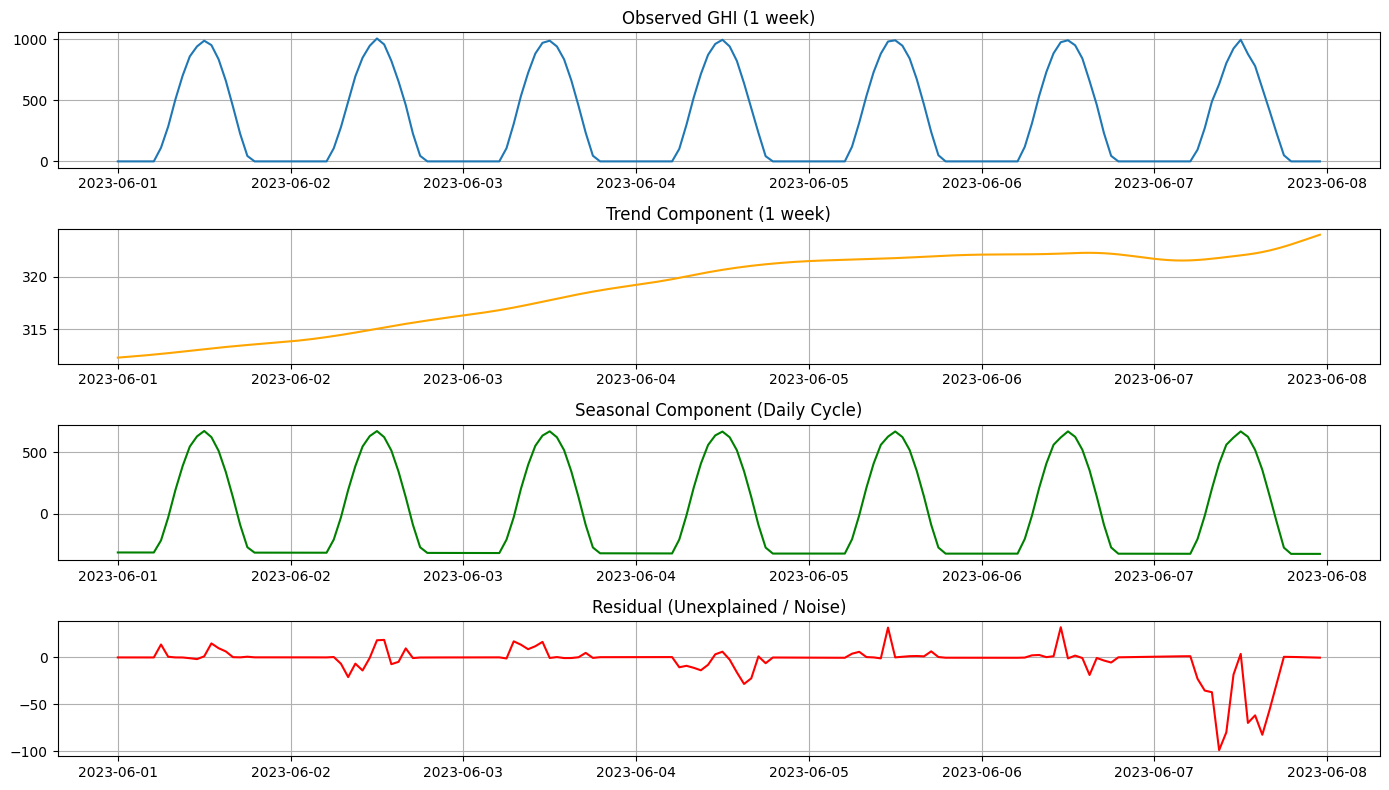

In [ ]:
import matplotlib.pyplot as plt

# 1-week window
start = '2023-06-01'
end = '2023-06-07'

# Slice the STL result
obs = result.observed[start:end]
trend = result.trend[start:end]
seasonal = result.seasonal[start:end]
resid = result.resid[start:end]

# Plot with zoom
plt.figure(figsize=(14, 8))

plt.subplot(4, 1, 1)
plt.plot(obs, label='Observed')
plt.title('Observed GHI (1 week)')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(trend, color='orange', label='Trend')
plt.title('Trend Component (1 week)')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(seasonal, color='green', label='Seasonal')
plt.title('Seasonal Component (Daily Cycle)')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(resid, color='red', label='Residual')
plt.title('Residual (Unexplained / Noise)')
plt.grid(True)

plt.tight_layout()
plt.show()


## 🔍 Interpretation of STL Decomposition

### 1. **Observed GHI**

* This is our raw Global Horizontal Irradiance (Wh/m²), hourly.
* You can clearly see the **annual solar cycle**: higher irradiance in mid-year (spring/summer), lower in winter.
* The pattern repeats across 2021–2023, consistent with **seasonal daylight variation**.

---

### 2. **Trend Component**

* The trend captures **long-term shifts** in solar energy availability over months.
* Peaks around mid-year, dips at end/start of each year — matches Saudi Arabia’s **solar geometry** (more sunlight during summer).
* Some sharp drops (e.g., late 2021, early 2022) may correspond to **extreme weather, sensor outages, or data quality gaps**.

---

### 3. **Seasonal Component (Daily Cycle)**

* This component isolates the **repeating daily pattern of GHI**.
* It’s highly consistent across the entire date range — this is a good sign.
* The amplitude narrows slightly in winter months, reflecting **shorter daylight hours** and **lower solar elevation**.

---

### 4. **Residual (Unexplained / Noise)**

* These are the irregularities not captured by the trend or seasonality — such as:

  * Dust storms 🏜️
  * Cloud cover ☁️
  * Sensor noise or gaps ⚠️
* The values bounce between ±200 to ±400 Wh/m² — which is typical for a volatile natural signal.
* You can see some large negative spikes — possibly indicating **outliers or missing data flags** (e.g., `-999` values not fully cleaned).

---


# 📐 Feature Engineering

In this section, we extract meaningful features from the raw time series data to improve the performance, interpretability, and physical grounding of our machine learning model.

Forecasting solar irradiance in Saudi Arabia requires special attention to both environmental conditions (such as dust, humidity, and seasonal variation) and temporal patterns (like daily and yearly solar cycles). To address this, we engineer features that capture:

* **Time-based patterns** (e.g., hour of day, day of year)
* **Autoregressive dependencies** (e.g., previous hour/day GHI)
* **Rolling statistics** to smooth short-term fluctuations
* **Physical indicators** like solar zenith angle and clearness index
* **Decomposed components** using STL (trend, seasonal, residual) for structured signal interpretation

These engineered features aim to provide the model with rich, context-aware inputs that reflect both **atmospheric physics** and **temporal dynamics**, improving its ability to generalize and forecast accurately — especially for a critical site like the Al Shuaibah 2 Solar Farm, aligned with Saudi Arabia’s Vision 2030 clean energy initiatives.

---

## Temporal Features (Time-Based)

These help your model understand solar patterns without needing to "relearn" them:
- Sun rises and sets around the same time of day.
- Cyclical encoding helps the model see that 23:00 and 00:00 are "close."

In [ ]:
import numpy as np

df['hour'] = df.index.hour
df['dayofyear'] = df.index.dayofyear
df['month'] = df.index.month
df['weekday'] = df.index.weekday
df['is_weekend'] = df['weekday'].isin([4, 5]).astype(int)  # Friday, Saturday in KSA

df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)


## Lag Features (Autoregressive)
- Solar irradiance depends heavily on the previous hour(s)
- 24h lag captures yesterday’s sun pattern — useful in consistent desert skies

In [ ]:
df['GHI_lag_1h'] = df['ALLSKY_SFC_SW_DWN'].shift(1)
df['GHI_lag_24h'] = df['ALLSKY_SFC_SW_DWN'].shift(24)

## Rolling Window Statistics (Local Trends)
- Smooths out short-term spikes due to clouds/dust
- Useful for capturing local weather stability

In [ ]:
df['GHI_roll_mean_3h'] = df['ALLSKY_SFC_SW_DWN'].rolling(window=3).mean()
df['T2M_roll_std_6h'] = df['T2M'].rolling(window=6).std()

## Domain-Based (Saudi) Physical Features that are already in Dataset

These are powerful and interpretable:

- ALLSKY_KT → Clearness index = GHI / extraterrestrial radiation (already provided)
- SZA → Solar Zenith Angle (degrees from vertical)
- ALLSKY_SRF_ALB → Albedo (reflectivity, especially useful with sand/dust)

In [ ]:
df['is_daylight'] = (df['ALLSKY_SFC_SW_DWN'] > 0).astype(int)

## Decomposition-Based Features:
These components help the model separate baseline vs. unpredictable variation.

(Already implemented this in the STL analysis):

```python
df['GHI_TREND'] = result.trend
df['GHI_SEASONAL'] = result.seasonal
df['GHI_RESIDUAL'] = result.resid
```

In [ ]:
display(df.iloc[5:10])

,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UV_INDEX,...,month,weekday,is_weekend,hour_sin,hour_cos,GHI_lag_1h,GHI_lag_24h,GHI_roll_mean_3h,T2M_roll_std_6h,is_daylight
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01 05:00:00,0.00,0.00,0.00,0.00,0.00,0.00,90.00,0.00,0.00,0.00,...,1,4,1,0.965926,2.588190e-01,0.00,NaN,0.000000,0.407009,0
2021-01-01 06:00:00,0.00,0.00,0.00,0.00,0.00,0.00,90.00,0.00,0.00,0.00,...,1,4,1,1.000000,6.123234e-17,0.00,NaN,0.000000,0.396421,0
2021-01-01 07:00:00,39.72,40.35,22.50,34.28,0.30,0.22,84.58,18.58,18.83,0.03,...,1,4,1,0.965926,-2.588190e-01,0.00,NaN,13.240000,0.268235,1
2021-01-01 08:00:00,203.00,205.23,214.64,126.78,0.48,0.21,72.65,93.43,94.13,0.50,...,1,4,1,0.866025,-5.000000e-01,39.72,NaN,80.906667,0.568565,1
2021-01-01 09:00:00,367.80,389.25,309.22,205.34,0.55,0.09,61.80,170.48,179.43,1.70,...,1,4,1,0.707107,-7.071068e-01,203.00,NaN,203.506667,1.030081,1


In [ ]:
display(df.describe())

,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UV_INDEX,...,month,weekday,is_weekend,hour_sin,hour_cos,GHI_lag_1h,GHI_lag_24h,GHI_roll_mean_3h,T2M_roll_std_6h,is_daylight
count,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,...,26280.000000,26280.000000,26280.000000,2.628000e+04,2.628000e+04,26279.000000,26256.000000,26278.000000,26275.000000,26280.000000
mean,255.953744,267.996677,227.443301,91.919206,0.301234,0.094338,70.820131,116.685575,121.347538,2.142585,...,6.526027,3.005479,0.286758,-1.879099e-17,-5.549425e-17,255.963483,255.998485,255.973224,1.244762,0.512747
std,334.655512,345.790381,291.357257,113.466771,0.314373,0.097795,24.710710,152.404515,156.518628,3.417422,...,3.447917,2.000487,0.452256,7.071202e-01,7.071202e-01,334.658155,334.695729,322.577130,0.831102,0.499847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.060000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,0.000000,0.000000,0.000000,0.027869,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.460000,0.000000,0.000000,0.000000,...,4.000000,1.000000,0.000000,-7.071068e-01,-7.071068e-01,0.000000,0.000000,0.000000,0.564166,0.000000
50%,13.240000,13.965000,1.595000,14.830000,0.250000,0.090000,87.875000,5.800000,6.110000,0.030000,...,7.000000,3.000000,0.000000,6.123234e-17,-6.123234e-17,13.250000,13.260000,55.341667,1.033333,1.000000
75%,532.235000,578.502500,487.300000,179.675000,0.640000,0.180000,90.000000,244.907500,264.055000,3.580000,...,10.000000,5.000000,1.000000,7.071068e-01,7.071068e-01,532.250000,532.280000,521.206667,1.788862,1.000000
max,1088.120000,1090.430000,1061.740000,562.010000,0.820000,0.360000,90.000000,478.720000,475.260000,16.050000,...,12.000000,6.000000,1.000000,1.000000e+00,1.000000e+00,1088.120000,1088.120000,1062.233333,5.100172,1.000000


## ❓ Why Are There NaNs?

NaN values in lag or rolling window features are expected at the edges of your time series.

We will drop rows with NaNs after feature engineering. This is the cleanest and most common approach for time series. These are only a few initial timestamps.
It avoids training your model on incomplete feature vectors.

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26256 entries, 2021-01-02 00:00:00 to 2023-12-31 23:00:00
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALLSKY_SFC_SW_DWN    26256 non-null  float64
 1   CLRSKY_SFC_SW_DWN    26256 non-null  float64
 2   ALLSKY_SFC_SW_DNI    26256 non-null  float64
 3   ALLSKY_SFC_SW_DIFF   26256 non-null  float64
 4   ALLSKY_KT            26256 non-null  float64
 5   ALLSKY_SRF_ALB       26256 non-null  float64
 6   SZA                  26256 non-null  float64
 7   ALLSKY_SFC_PAR_TOT   26256 non-null  float64
 8   CLRSKY_SFC_PAR_TOT   26256 non-null  float64
 9   ALLSKY_SFC_UV_INDEX  26256 non-null  float64
 10  QV2M                 26256 non-null  float64
 11  T2M                  26256 non-null  float64
 12  T2MDEW               26256 non-null  float64
 13  T2MWET               26256 non-null  float64
 14  PRECTOTCORR          26256 non-null  float64
 15  P

In [ ]:
# Save to CSV, keeping the datetime index
df.to_csv("augmented_weather_data.csv", index=True)

### Note:
Discrete wavelet transform (DWT), a technique with a mathematical origin, is very appropriate for noise filtering, data reduction, and singularity detection, which makes it a good choice for time series data processing. We will hold off for now until we do a baseline model test, since the features will become less interpretable.



# ⚓ Conclusion: Exploratory Data Analysis & Feature Engineering

In this notebook, we performed a detailed exploratory analysis of the raw and derived features related to Global Horizontal Irradiance (GHI) at the future site of the Al Shuaibah 2 Solar Farm in Saudi Arabia. Key takeaways include:

- We verified the data quality and removed error values such as `-999`, particularly during nighttime or low-irradiance periods.
- Using correlation analysis, we identified highly predictive features like `ALLSKY_KT`, `ALLSKY_SFC_SW_DNI`, and `ALLSKY_SFC_PAR_TOT`, while dropping redundant or weak features (e.g., `ALLSKY_SFC_UVA`).
- Temporal and cyclical patterns were captured through STL decomposition and sine/cosine encodings of hourly time.
- Additional engineered features, including lag values, rolling statistics, and binary flags (`is_weekend`, `is_daylight`), were added to enhance the model's ability to learn from historical and seasonal trends.

With a robust, fully cleaned, and feature-rich dataset, we are now ready to move into the modeling phase to forecast GHI in support of energy optimization efforts aligned with Saudi Arabia’s Vision 2030 goals.
